In [1]:
# Library imports! I basically copy/paste this into the first cell of all my codes, as these libraries are all heavily used
# in astronomy. Many of them might go unused, but I don't mind importing a couple extra things :)

# If you don't have any of these installed (i.e. you get an error when you try to run this cell), you can go to your command 
# line and type in "pip install _____" as long as you have pip installed (comes automatically with a lot of places you download 
# Python)--let me know if you need help installing pip

import pandas as pd # this library is used for working with DataFrames--very useful in astronomy
import csv # for working with csv files, like you'd see in Microsoft Excel
from matplotlib import pyplot as plt # used for plotting graphs
import numpy as np # all sorts of mathematical applications
import glob # used for grabbing a bunch of files at once
import statistics # the name says it all
import scipy # again, all sorts of mathematical applications
from mpl_toolkits import mplot3d # used for three-dimensional plots, which we'll revisit at a later time
from astroquery import gaia # Gaia!
from astroquery.gaia import Gaia
import astropy.units as u # very handy for keeping track of units, which are very easy to get mixed up
from astropy.units import Quantity
from astropy.coordinates.sky_coordinate import SkyCoord # used for interpreting RA and Dec coordinates
from astropy import table # sometimes astronomy data downloads in tables, which I find incredibly annoying to work with
from astropy.io.votable import parse # used to parse through votable files (again, often seen in astronomy)
from scipy.stats import norm # some extra stats stuff I've used for fitting
from scipy.stats import powerlaw
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import math
import seaborn as sns # super cool library that allows us to make contour plots and cool data visualizations
from astroquery.ipac.irsa import sha # some extra imports for downloading data
from astropy import coordinates as coord
from astroquery.ipac.irsa import Irsa
import numpy.ma as ma
Irsa.ROW_LIMIT = 40000 # limits the number of rows that a query returns so that the query doesn't run forever--just make sure
# to check that the number of rows in your data hasn't hit this number afterwards so you know you aren't missing any sources

C:\Users\sophi\AppData\Local\Programs\Python\Python311\Lib\site-packages\astroquery\ipac\irsa\sha\__init__.py:14: UserWarning: Experimental: SHA has not yet been refactored to have its API match the rest of astroquery.
  warnings.warn("Experimental: SHA has not yet been refactored to have its "


In [13]:
Gaia.ROW_LIMIT = 100000

# this has you specify the center of the area that you would like to look at in right ascension (ra) and Declination (dec)
# for the purposes of this tutorial, I'm going to have you look at the Orion Nebula Cluster
# I got these coordinates from SIMBAD (which you can Google)
onc_ra = 83.82084 #degrees
onc_dec = -5.391111 #degrees
coord = SkyCoord(ra = onc_ra, dec = onc_dec, unit=(u.degree, u.degree), frame='icrs') 
#ICRS = International Celestial Reference System

#then, you define the size of the area you'd like to look at. Here, we'll look at a cone with a radius of half a degree 
job = Gaia.cone_search_async(coord, radius=u.Quantity(0.5, u.deg))

results = job.get_results()

#This cell may take a second to run....

INFO: Query finished. [astroquery.utils.tap.core]


In [14]:
type(results) #tells you what format the results are in -- here we have an astropy Table

astropy.table.table.Table

In [15]:
len(results) #make sure this number is smaller than the Gaia row limit you assigned

4846

In [16]:
# I like working with pandas DataFrames, so here I am converting the astropy table to a DataFrame
dictionary = {}
for name in results.colnames:
    dictionary[str(name)] = results[str(name)]
gaia = pd.DataFrame(data=dictionary)

In [17]:
# Here's a preview of what the DataFrame looks like!
gaia

,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 3017364063331140224,3017364063331140224,102240017,2015.5,83.819719,0.053257,-5.390340,0.059865,2.472314,...,200111.0,2.385153,1.416072,2.690297,12.891893,12.359015,13.424771,https://gea.esac.esa.int/data-server/datalink/...,,0.001364
1,1635721458409799680,Gaia DR2 3017364059023817600,3017364059023817600,1051452587,2015.5,83.821116,0.076893,-5.392786,0.085720,1.536199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001691
2,1635721458409799680,Gaia DR2 3017364063325263360,3017364063325263360,1291616513,2015.5,83.820770,0.254868,-5.393625,0.263055,2.056557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002510
3,1635721458409799680,Gaia DR2 3017364063330718080,3017364063330718080,1673371952,2015.5,83.818619,0.266350,-5.389696,0.253225,2.706629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002633
4,1635721458409799680,Gaia DR2 3017363960246048384,3017363960246048384,299916628,2015.5,83.821084,0.282569,-5.394377,0.354643,1.538196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.003269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,1635721458409799680,Gaia DR2 3017400828249372928,3017400828249372928,101448698,2015.5,84.192894,0.121078,-5.055855,0.122449,0.721482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.499671
4842,1635721458409799680,Gaia DR2 3017395158892542976,3017395158892542976,164077697,2015.5,84.253623,0.079504,-5.138012,0.080706,0.496347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.499780
4843,1635721458409799680,Gaia DR2 3017241497837015424,3017241497837015424,1573114537,2015.5,83.573922,0.793104,-5.826437,0.800807,1.796852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.499893
4844,1635721458409799680,Gaia DR2 3017253871638555520,3017253871638555520,601463814,2015.5,83.496841,0.112240,-5.773118,0.113491,2.512176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.499911


In [18]:
# Now you have a DataFrame with all the information you need. You can start playing around with this and seeing what
# you can do! To get you started, here's me just plotting the sources on ra and dec (basically just x and y)

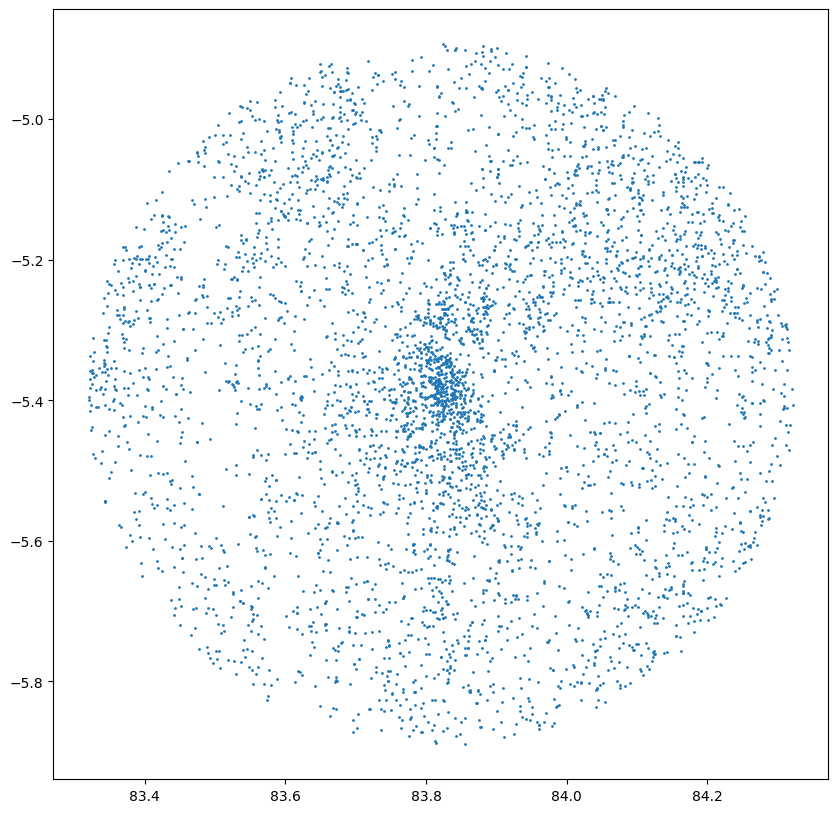

In [20]:
plt.figure(figsize=(10,10)) # making sure it's the same size on both axes so we don't get a weird image
plt.scatter(gaia['ra'], gaia['dec'], s=1)
plt.show()
# here you can see the cluster in the center of the image!

In [21]:
# In this cell, try plotting a histogram of all the ra values--what do you see?

In [22]:
# In this cell, do the same with the dec values and make some observations

In [23]:
# In this cell, try using the parallax values to calculate the distances of all the sources (use a 3018 formula)

In [24]:
# In this cell, plot the distances on a histogram and make some observations